# analysis of the gaming products market

<h1>содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя" data-toc-modified-id="Портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

### Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

In [1]:
# импортирую библиотеку pandas как главного инструмента для решения поставленных задач
import pandas as pd
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib для визуализации
import matplotlib.pyplot as plt
# выберу стиль для plt инструментов
plt.style.use('ggplot')
# импортирую библиотеку scipy для выполнения научных и инженерных расчётов
from scipy import stats as st
# импортирую библиотеку для работы со временем
from datetime import datetime
# импортирую библиотеку для работы с массивами данных
import numpy as np

In [4]:
# открываем файл
df = pd.read_csv('/datasets/games.csv')

In [5]:
# начинаем изучать файл
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div style="border:solid DarkCyan 3px; padding: 20px"> Первичный осмотр показывает, что фрейм данных нуждается в серьезной предообработки.  </div> 

In [6]:
# посмотрим, для более полного первичного представления о датафрейме, последние его 15 строк
df.tail(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


<div class="alert alert-info"> <b>Комментарий:</b> В ходе первичного осмотра датафрейма наблюдаются следующие его недостатки:


*1.  Наименования атрибутов представлены в плохом стиле 'верблюжий регистр', необходимо переводить в 'змеинный регистр';*
    
*2. Во многих столбцах встречаются NaN (отсутствующее в ячейке число), что свидетельствует об отсутствии данных. Значения None (нечисловой тип 'NoneType')  пока не встречается, но полностью исключать этот фактор нельзя, требуется проверка.*
    
*3. Атрибуты, значения прописаны с заглавных букв, этот фактор может вызвать скрытое дублирование, требуется привести фрейм данных к прописным буквам.*  

</div>

In [7]:
# пришло время получить общую информацию о данных в таблице df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Анализируя полученную информацию устанавливаем следующее описание датафрейма:**

*Общая информация по фрейму данных: в нашем распоржении фрейм данных, состоящий из  11 столбцов и 16715 строк*

*1. Name — название игры, категориальное значение, представлен в типе - object, что правильно, есть  16713 строк, отсутсвуют данные в двух строках, этот вопрос требует проработки*;  

*2. Platform — платформа, категориальное значение, представлен в типе - object, что правильно, есть  16715 строк, отсутсвующих данных нет*;

*3. Year_of_Release — год выпуска, значение даты и времени, представлен в типе - float, что не правильно, требуется перевод в тип datetime, есть  16446 строк, отсутсвуют 269 данных в  строках, этот вопрос требует проработки*;

*4. Genre — жанр игры, категориальное значение, представлен в типе - object, что правильно, есть  16713 строк, отсутсвуют данные в двух строках, этот вопрос требует проработки;*

*5. NA_sales — продажи в Северной Америке (миллионы проданных копий), представлен в типе - float, что не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть  16715 строк, отсутствующих данных нет*;

*6. EU_sales — продажи в Европе (миллионы проданных копий), представлен в типе - float, что не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть  16715 строк, отсутствующих данных нет;*

*7. JP_sales — продажи в Японии (миллионы проданных копий), представлен в типе - float, что не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть  16715 строк, отсутствующих данных нет;* 

*8. Other_sales — продажи в других странах (миллионы проданных копий), представлен в типе - float, что не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть  16715 строк, отсутствующих данных нет;*

*9. Critic_Score — оценка критиков (максимум 100), представлен в типе - float, данный тип данных допускается, 8137 значений присутсвует  в столбце, остальные 8578 значений предстоит заполнить после более детального исследования*

*10. User_Score — оценка пользователей (максимум 10), представлен в типе - object, что требует изменения на тип - float, есть значения в 10014  сроках, в остальных 6701 строках данные отсутствуют;*

*11. Rating — рейтинг от организации ESRB - представлен в типе - object, что требует изменения на тип - float, присутсвуют в столбце 9949 значений, остальные 6766 отсутствуют,  их предстоит заполнить после более детального исследования.*


### Вывод

<div style="border:solid DarkCyan 3px; padding: 20px"> 
    По результатам изучения данных можно спланировать действия для проведения операции в рамках предобработки данных, а именно:

1) устранить плохой стиль 'верблюжий регистр' и перевести его в правильный 'змеинный регистр';

2) убрать заглавные буквы и привести фрейм данных к прописным буквам;
    
3) поработать со значениями NaN в столбцах, найти решение отсутсвующих в ячейке чисел, проверить наличие значения None (нечисловой тип 'NoneType');

4) приступить к приведенению типов данных во всех столбцах, которые рассмотрены в ходе их анализа согласно их назначению в целях более точного проведения исследования;

5) проверить наличие дубликатов, в том числе скрытых дубликатов.
</div> 

## Предобработка данных

In [8]:
 # проведем подсчёт пропусков
(df.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
# расчитаем общее количество 'NaN'  в дата фрейме
print('NaN occurrences in DataFrame:', df.isna().sum().sum())

NaN occurrences in DataFrame: 22318


<div style="border:solid DarkCyan 3px; padding: 20px"> Результаты изучения данных подверждаются в части отсутсвующих значений, их общее количество составляет: 22318. </div> 

**1. Начнем со столбца Name**

In [10]:
# убедимся, что 'NaN' содержится в столбце датафрейма
df['Name'].isna().sum()

2

In [11]:
# посмотрим на строки где пропущены значения в столбце Name
df[df['Name'].isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# для соблюдения формы посчитаем с использованием функции Len
(len(df[df['Name'].isna()]))

2

<div style="border:solid DarkCyan 3px; padding: 20px"> Проанализируем найденные две строки с NaN, о чем они говорят. Значение индекса дает нам понять, что проблемными строками в таблице Name являются 659, 14244, категориальные значения. Первая мысль возникает удалить их, но прежде чем это сделать неоходимо ответить на вопрос: случайно ли были потеряны данные, либо неслучайно.  Можно ли их восстановить, другими словами вылечить. Чтобы ответить на поставленный вопрос требуется понять о чем говорят другие столбцы.  Характеристику дают всего два столбца, которые косвено могут охарактеризовать потерянные значения в Name: Platform - GEN,  Year_of_Release - 1993.0, важное значение Genre также потеряно,  другие значения по количеству продаж в континентах нам ничего не говорят. Прихожу к заключению, что данные потеряны не случайно, в следствии какого-то негативного фактора: технического, человеческого... Необходимо две строки удалять, их меньше процента — это немного, и в большинстве задач удаление такой доли строк не повлияет на результаты.  </div> 

In [13]:
# указываем на значение TRUE, изменения сохраняются в новом объекте, который создается, и он не изменяет исходные данные
# указываем axis = 0, чтобы работать с удалением строк! Критично важно!
df.dropna(subset=['Name'],inplace=True, axis=0)
# df['Name'] = df['Name'].dropna # использую переопределение переменных.

In [14]:
# проверим, что операция по удалению строк осуществлена
len(df[df['Name'].isna()])

0

**2. Столбец Platform**

In [15]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<div style="border:solid DarkCyan 3px; padding: 20px"> Оставляем столбец  Platform в том виде какой есть.</div> 

**3. Столбец Year_of_Release**

<div style="border:solid DarkCyan 3px; padding: 20px"> На этапе изучения данных установлено, что значение даты и времени, представлен в типе - float, что не правильно, требуется перевод в тип datetime, есть 16446 строк, отсутсвуют 269 данных в строках, этот вопрос требует проработки. </div> 

In [16]:
# переведем значения столбца Year_of_Release из типа - float в тип -  datetime.
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y', errors='coerce')

In [17]:
# посмотрим
df['Year_of_Release'].head()

0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: Year_of_Release, dtype: datetime64[ns]

<div style="border:solid DarkCyan 3px; padding: 20px"> Стало лучше.  dtype: datetime64  </div> 

In [18]:
# отсутсвуют 269 данных в столбце 'Year_of_Release', этот вопрос требует проработки
# убедимся, что 'NaN' содержится в столбце датафрейма
df['Year_of_Release'].isna().sum()

269

<div style="border:solid DarkCyan 3px; padding: 20px"> 269 от общего количества строк 16715 составляет - 1,6 %. Удаление такого количества строк нежелательно, замена на медианные значения и арифметические по отношению к датам не применима. Представляется, что наилучшим способом будет оставить все как есть. </div> 

In [19]:
df['Year_of_Release'].value_counts().sum()

16444

**4. Столбец Genre**

<div style="border:solid DarkCyan 3px; padding: 20px"> На этапе изучения данных из файла установлено, что это категориальное значение, представлен в типе - object, что правильно, есть 16713 строк, отсутсвуют данные в двух строках. После исследования стобца Name было принято взвешенное решение об удалении данных строк, где в том числе отсутсвовали значения в двух строках Genre, следовательно проблема данного столбца должна быть устранена, на всякий случай проверим ниже данную гипотезу.  </div> 

In [20]:
df['Genre'].isna().sum()

0

<div style="border:solid DarkCyan 3px; padding: 20px">  получаем подтверждение, что предположение было правильным.</div> 

**5. Столбец NA_sales**

<div style="border:solid DarkCyan 3px; padding: 20px"> Ранее установлено, что столбец с продажами в Северной Америке (миллионы проданных копий), представлен в типе - float, что не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть 16715 строк, отсутствующих данных нет. </div>

In [21]:
# меняем значение в столбце NA_sales тип данных с float на integer
df['NA_sales'] = df['NA_sales'].astype(int)

In [22]:
# посмотрим на результат
df['NA_sales'].dtypes

dtype('int64')

In [23]:
# убедимся в отсутсвтии NaN
df['NA_sales'].isna().sum()

0

**6. Столбец EU_sales**

<div style="border:solid DarkCyan 3px; padding: 20px"> Ранее установлено, что продажи в Европе (миллионы проданных копий), представлен в типе - float, что не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть 16715 строк, отсутствующих данных нет. Исправим этот недостаток.</div>

In [24]:
# меняем значение в столбце EU_sales тип данных с float на integer
df['EU_sales'] = df['EU_sales'].astype(int)

In [25]:
# посмотрим на результат
df['EU_sales'].dtypes

dtype('int64')

In [26]:
# убедимся в отсутсвтии NaN
df['EU_sales'].isna().sum()

0

**7. Столбец JP_sales**

<div style="border:solid DarkCyan 3px; padding: 20px"> Ранее установлено, что продажи в Японии (миллионы проданных копий), представлен в типе - float и это не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть 16715 строк, отсутствующих данных нет. </div>

In [27]:
# меняем значение в столбце JP_sales тип данных с float на integer
df['JP_sales'] = df['JP_sales'].astype(int)

In [28]:
# посмотрим на результат
df['JP_sales'].dtypes

dtype('int64')

In [29]:
# убедимся в отсутсвтии NaN
df['JP_sales'].isna().sum()

0

**8. Столбец Other_sales**

<div style="border:solid DarkCyan 3px; padding: 20px"> Ранее установлено, что продажи в других странах (миллионы проданных копий), представлен в типе - float, что не правильно, копии не могут быть в дробных значениях, более точный тип данных - integer, есть 16715 строк, отсутствующих данных нет. </div>

In [30]:
# меняем значение в столбце Other_sales тип данных с float на integer
df['Other_sales'] = df['Other_sales'].astype(int)

In [31]:
# посмотрим на результат
df['Other_sales'].dtypes

dtype('int64')

In [32]:
# убедимся в отсутсвтии NaN
df['Other_sales'].isna().sum()

0

**9. Столбец Critic_Score**

<div style="border:solid DarkCyan 3px; padding: 20px"> Critic_Score — оценка критиков (максимум 100), представлен в типе - float, данный тип данных допускается, 8137 значений присутсвует в столбце, остальные 8578 значений предстоит заполнить после более детального исследования. 
    
    Анализ и определение дальнейших действий: 
    
отсутствуют  8578 значений данных, это более 50 % данных всех значений в столбце. Операция по удалению не допустима - уничтожим половину фрейма данных, полагаю, что в данном случае лучше заменить на нулевые значения, данные значения не ухудшат столбец, при этом столбец будет смотреться эстетичнее.

In [33]:
# методом fillna заменяем все пустые значения на '0'
df['Critic_Score'] = df.Critic_Score.fillna(0)

In [34]:
# убедимся в отсутсвтии NaN
df['Other_sales'].isna().sum()

0

**10. Столбец User_Score**

<div style="border:solid DarkCyan 3px; padding: 20px"> User_Score — оценка пользователей (максимум 10), представлен в типе - object, что требует изменения на тип - float, есть значения в 10014 сроках, в остальных 6701 строках данные отсутствуют. </div>

In [35]:
# посмотрим на первые 15 строк с методом уникальных значений value_counts
df['User_Score'].value_counts().head(15)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7       220
7.6     220
7.4     215
Name: User_Score, dtype: int64

In [36]:
# посмотрим на последние 15 строк с методом уникальных значений value_counts
df['User_Score'].value_counts().tail(10)

1.5    2
1.1    2
0.6    2
0.7    2
0.2    2
1      2
9.6    2
0.9    2
9.7    1
0      1
Name: User_Score, dtype: int64

<div style="border:solid DarkCyan 3px; padding: 20px"> видим значение 'tbd' в 2424 строках, данное значение не соответствует логике атрибута User_Score. Справдливее всего заменить 'tbd' значение на медиану. </div>

In [37]:
# переводим tbd в NaN
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [38]:
# далее создаем переменную с медианными значениями 
median_user_score = df['User_Score'].median(skipna=True)

In [39]:
# заменяем NaN на медианные значения
df['User_Score'] = df.User_Score.fillna(median_user_score)

In [40]:
# заменяем тип данных int на float
df[['User_Score']] = df[['User_Score']].astype(float)

In [41]:
# смотрим, что удалось
df['User_Score'].dtypes

dtype('float64')

In [42]:
# смотрим на результат
df['User_Score'].value_counts().head(15)

7.5    9374
7.8     324
8.0     290
8.2     282
8.3     254
8.5     253
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.0     220
7.6     220
7.4     215
8.6     211
Name: User_Score, dtype: int64

**11. Столбец Rating**

<div style="border:solid DarkCyan 3px; padding: 20px">  Rating — рейтинг от организации ESRB - представлен в типе - object, что требует изменения на тип - float, присутсвуют в столбце 9949 значений, остальные 6766 отсутствуют, их предстоит заполнить после более детального исследования. </div>

In [43]:
# посмотрим на первые 10 строк с методом уникальных значений value_counts
df['Rating'].value_counts().head(10)

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

- «E» («Everyone») — «Для всех»;
- «T» («Teen») — «Подросткам 13—19 лет»;
- «M» («Mature») — «От 17 лет»;
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»;
- «EC» («Early childhood») — «Для детей младшего возраста»;
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»;
- K-A: Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес [позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т];
- «AO» («Adults Only 18+») — «Только для взрослых».

<div style="border:solid DarkCyan 3px; padding: 20px">  Характеристика аббревиатур убеждает, что все они соответствуют действительности и устранения ошибок в данных аббревиатурах отсутсвует, они помогают сегментировать игры. Уже на данном этапе можно сделать вывод, что больше всего игр представлено в сегменте «E» («Everyone») — «Для всех». Отсутствующие значения нет смысла менять, так как это прерогатива специальной организации. </div>

**Заключительный этап работы по предобработке фрейма данных**

In [44]:
# посмотрим на итоговую очистку фрейма данных (за искл. Year_of_Release, оставили без изменений)
(df.isna().sum())

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score          0
User_Score            0
Rating             6764
dtype: int64

In [45]:
# посмотрим на типы данных, все ли в порядке
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16713 non-null object
Year_of_Release    16444 non-null datetime64[ns]
Genre              16713 non-null object
NA_sales           16713 non-null int64
EU_sales           16713 non-null int64
JP_sales           16713 non-null int64
Other_sales        16713 non-null int64
Critic_Score       16713 non-null float64
User_Score         16713 non-null float64
Rating             9949 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 1.5+ MB


<div style="border:solid DarkCyan 3px; padding: 20px">  Можем работать дальше над проектом, приступаем к устранению плохого стиля, сменяем 'верблюжий регистр' на 'змеинный регистр, далее убираем заглавные буквы и приводим фрейм данных к прописным буквам. Проверим на наличе дубликатов, в том числе скрытых дубликатов.</div>

In [46]:
# для предварительной подготовки к исследованию данных приведем все данные object в датасете к нижнему регистру
df[['Name', 'Platform', 'Genre']] = df[['Name', 'Platform', 'Genre']].astype(str).apply(lambda x: x.str.lower())

In [47]:
# посмотрим  все ли в порядке
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,wii sports,wii,2006-01-01,sports,41,28,3,8,76.0,8.0,E
1,super mario bros.,nes,1985-01-01,platform,29,3,6,0,0.0,7.5,NaN
2,mario kart wii,wii,2008-01-01,racing,15,12,3,3,82.0,8.3,E
3,wii sports resort,wii,2009-01-01,sports,15,10,3,2,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11,8,10,1,0.0,7.5,NaN


In [48]:
# устраняем верблюжий регистр
df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release',\
                        'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales',\
                       'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score',\
                        'Rating': 'rating'})

In [49]:
# посмотрим  еще раз - стало лучше 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006-01-01,sports,41,28,3,8,76.0,8.0,E
1,super mario bros.,nes,1985-01-01,platform,29,3,6,0,0.0,7.5,NaN
2,mario kart wii,wii,2008-01-01,racing,15,12,3,3,82.0,8.3,E
3,wii sports resort,wii,2009-01-01,sports,15,10,3,2,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11,8,10,1,0.0,7.5,NaN


In [50]:
# рассмотреим дата сет на предмет наличия явных дубликатов
df.duplicated().sum()

0

<div style="border:solid DarkCyan 3px; padding: 20px"> Согласно условиям задачи в рамках проекта необходимо посчитать суммарные продажи во всех регионах и записать их в отдельный столбец. </div>

In [51]:
# посчитаем суммарные продажи во всех регионах в отдельном столбце 'total_sales'
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-info"> <b> Комментарий студента:  </b> Благодарю 👍</div>

In [52]:
df['id'] = df.reset_index().index

In [53]:
# посмотрим на результат в первых 10 строчках
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,id
0,wii sports,wii,2006-01-01,sports,41,28,3,8,76.0,8.0,E,80,0
1,super mario bros.,nes,1985-01-01,platform,29,3,6,0,0.0,7.5,NaN,38,1
2,mario kart wii,wii,2008-01-01,racing,15,12,3,3,82.0,8.3,E,33,2
3,wii sports resort,wii,2009-01-01,sports,15,10,3,2,80.0,8.0,E,30,3
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11,8,10,1,0.0,7.5,NaN,30,4
5,tetris,gb,1989-01-01,puzzle,23,2,4,0,0.0,7.5,NaN,29,5
6,new super mario bros.,ds,2006-01-01,platform,11,9,6,2,89.0,8.5,E,28,6
7,wii play,wii,2006-01-01,misc,13,9,2,2,58.0,6.6,E,26,7
8,new super mario bros. wii,wii,2009-01-01,platform,14,6,4,2,87.0,8.4,E,26,8
9,duck hunt,nes,1984-01-01,shooter,26,0,0,0,0.0,7.5,NaN,26,9


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null int64
eu_sales           16713 non-null int64
jp_sales           16713 non-null int64
other_sales        16713 non-null int64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             9949 non-null object
total_sales        16713 non-null int64
id                 16713 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 1.8+ MB


**Вывод:**

Все выявленные недостатки на этапе изучения датафрейма и в процессе его предообработки выполнены, подготовлен столбец с расчетом суммарных значений продаж во всех регионах, датасет готов к следующему этапу работы для применения аналитических инструментов. В распоряжении датафрейм состоящий из 13 столбцов и 16713 строк.

##  Исследовательский анализ данных

- посмотрите, сколько игр выпускалось в разные годы;
- важны ли данные за все периоды? 
- посмотрите, как менялись продажи по платформам. 
- выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
- за какой характерный срок появляются новые и исчезают старые платформы? 
- возьмите данные за соответствующий актуальный период. 
- актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 
- основной фактор — эти данные помогут построить прогноз на 2017 год. 
- не учитывайте в работе данные за предыдущие годы. 
- какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. 
- постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- опишите результат. 
- посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
- сформулируйте выводы. 
- соотнесите выводы с продажами игр на других платформах. 
- посмотрите на общее распределение игр по жанрам. 
- что можно сказать о самых прибыльных жанрах? 
- выделяются ли жанры с высокими и низкими продажами?

In [55]:
# для  начала проведения анализа создам специально переменную-аналог фрейму данных df с которомы могу эксперементировать
df_1 = df

In [56]:
df_1.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,id
0,wii sports,wii,2006-01-01,sports,41,28,3,8,76.0,8.0,E,80,0
1,super mario bros.,nes,1985-01-01,platform,29,3,6,0,0.0,7.5,NaN,38,1


<div style="border:solid DarkCyan 3px; padding: 20px"> Задача: посмотрите, сколько игр выпускалось в разные годы. Процесс решения данной задачи вижу так: надо составить ранжирование по годам столбец 'year_of_release', к столбцу требуется  прицепить другой важный столбец, подсчитывающий количество игр.</div>

In [57]:
# используем для решения данной задачи метод сводных таблиц, создам специальную  переменную  'how_games_years' в которой
# отражаем стобец year_of_release и игры - по присвоенным им уникальным идентификаторам - id (количественное значение)
#  чтобы функция summ  могла провести расчеты
how_games_years = df_1.pivot_table(index = 'year_of_release', values = 'id', aggfunc = sum)

In [58]:
how_games_years

,id
year_of_release,
1980-01-01,29737
1981-01-01,189829
1982-01-01,148728
1983-01-01,56552
1984-01-01,22857
1985-01-01,55606
1986-01-01,35890
1987-01-01,54609
1988-01-01,37236


<div style="border:solid DarkCyan 3px; padding: 20px"> Смотрим на количество выпущенных игр в разные годы. Для наглядности можно их отобразить в виде линейного графика. </div>

Text(0, 0.5, 'Количество игр')

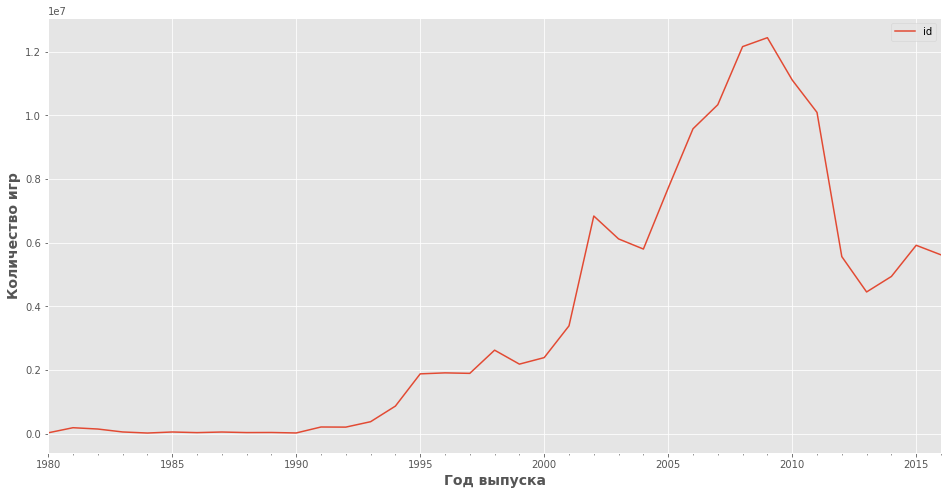

In [59]:
how_games_years.plot(kind='line', figsize=(16,8))
plt.xlabel("Год выпуска", fontsize=14, fontweight="bold")
plt.ylabel("Количество игр", fontsize=14, fontweight="bold")

<div style="border:solid DarkCyan 3px; padding: 20px"> Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам?. Используя метод сводных таблиц и визуализации мы замечаем такую закономерность, что в период с 1980 по 1993 год, то есть в течение 13 лет количество выпущенных игр ежегодно не превышало отметку 400 тыс., далее с 1993 г. до 2009 г. наметился стабильный рост показателя количества выпущенных игр, то есть в течение 16 лет с 1990 года этот показатель вырос в 30 раз (составил - 12436 тыс.). Далее после 2009 г. наметился тренд падения показателя до уровня 2001 года и в 2013 (составил - 4452 тыс.). Затем тренд незначительно подрос и к  2016 г. составил  5617 тыс. выпускаемых игр во всем мире.  Рост количества игр после 1993 года можно связать с увеличением спроса со стороны потребителей к использованию игровых платформ и соответственно самих игр, падение спроса в 2008 году можно связать с появлением серьезного конкурента на рынке в виде компьютера, который стал более доступным по ценам для широкого потребителя и позволял загружать игровые симуляторы с наименьшими затратами.  </div>

In [60]:
# построим распределение платформ с наибольшими продажами
platform_group = df_1.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

In [61]:
# посмотрим, что получилось, выведем первые 10 платформ
platform_group.head(10)

,total_sales
platform,
wii,416
ps2,400
x360,379
ds,282
ps3,282
ps,239
gb,169
nes,159
ps4,127


In [62]:
# добавим индексацию 
platform_group = platform_group.head(10).reset_index()

In [63]:
# посмотрим на полученное распределение 
platform_group.head(10)

,platform,total_sales
0,wii,416
1,ps2,400
2,x360,379
3,ds,282
4,ps3,282
5,ps,239
6,gb,169
7,nes,159
8,ps4,127
9,3ds,106


In [64]:
# отранжируем самые передовые платформы с наибольшими суммарными продажами
largest_platform_group = platform_group['platform'].unique()

In [65]:
# посмотрим на платформы - лидеры
largest_platform_group

array(['wii', 'ps2', 'x360', 'ds', 'ps3', 'ps', 'gb', 'nes', 'ps4', '3ds'],
      dtype=object)

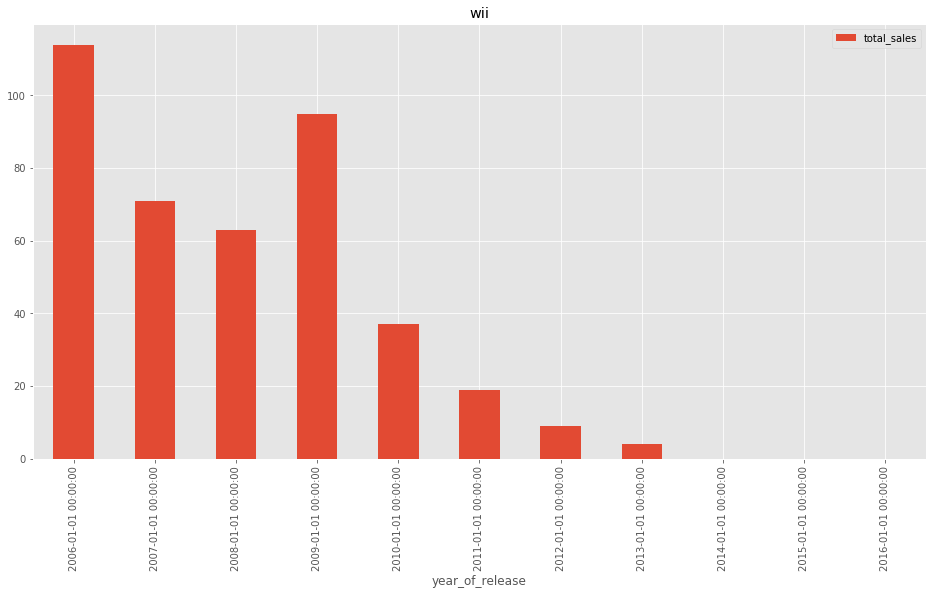

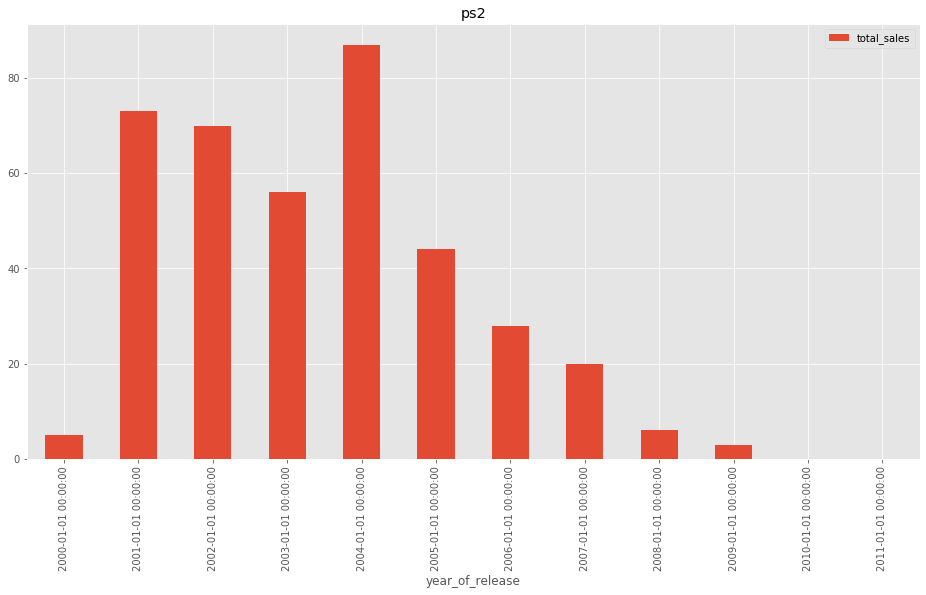

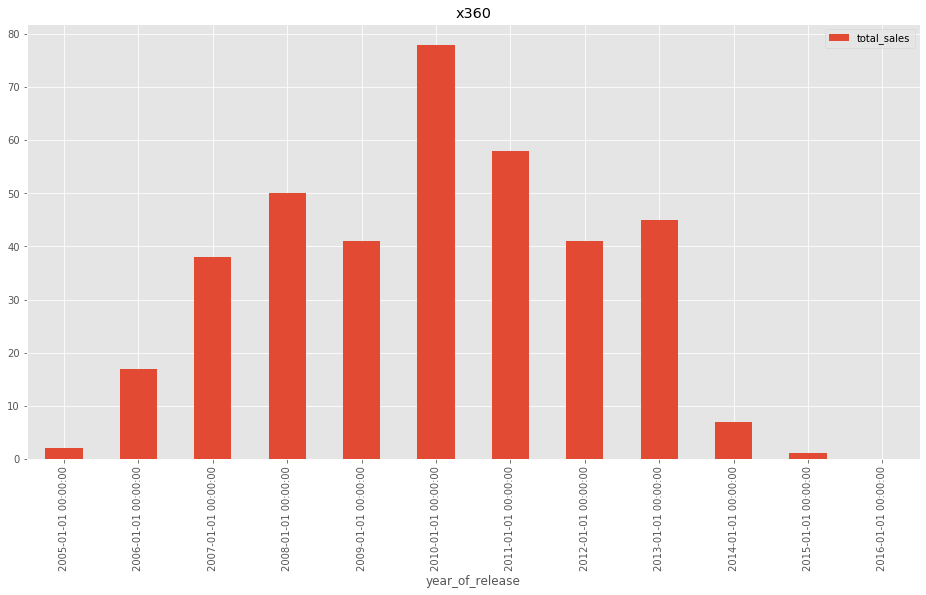

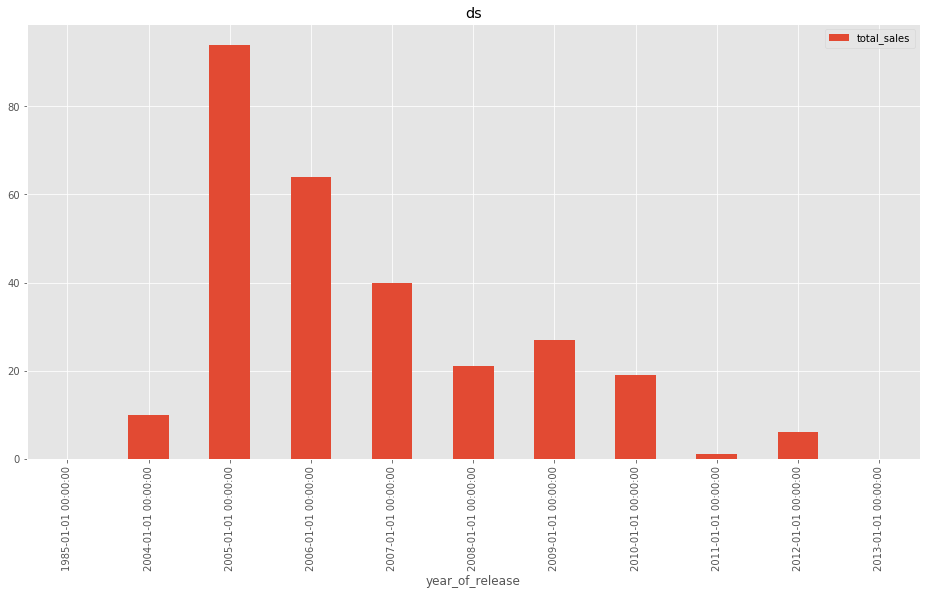

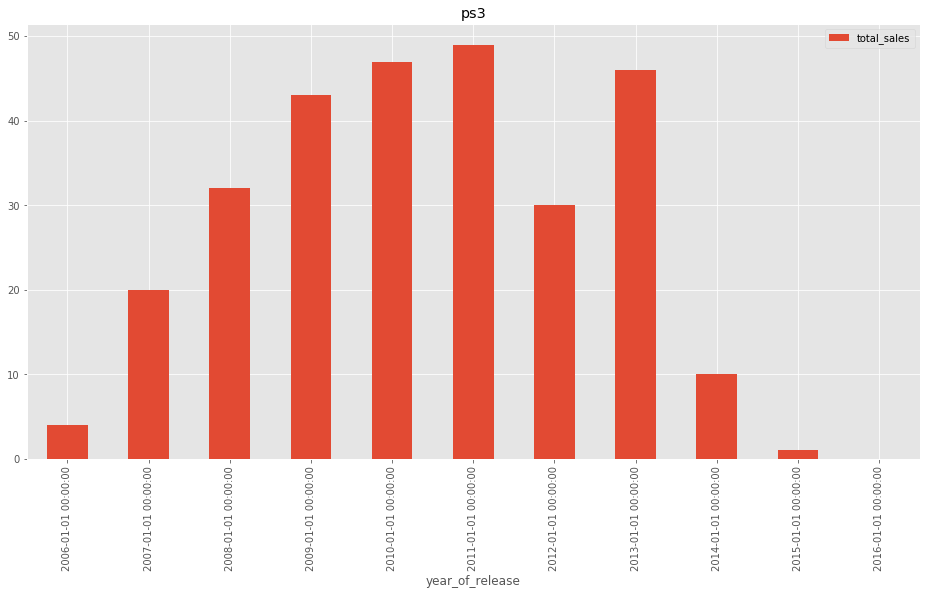

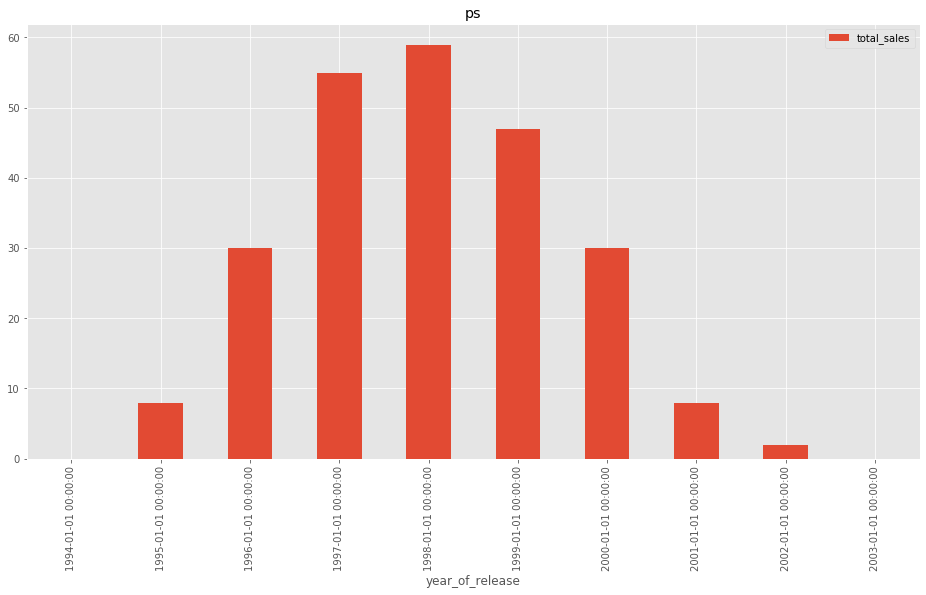

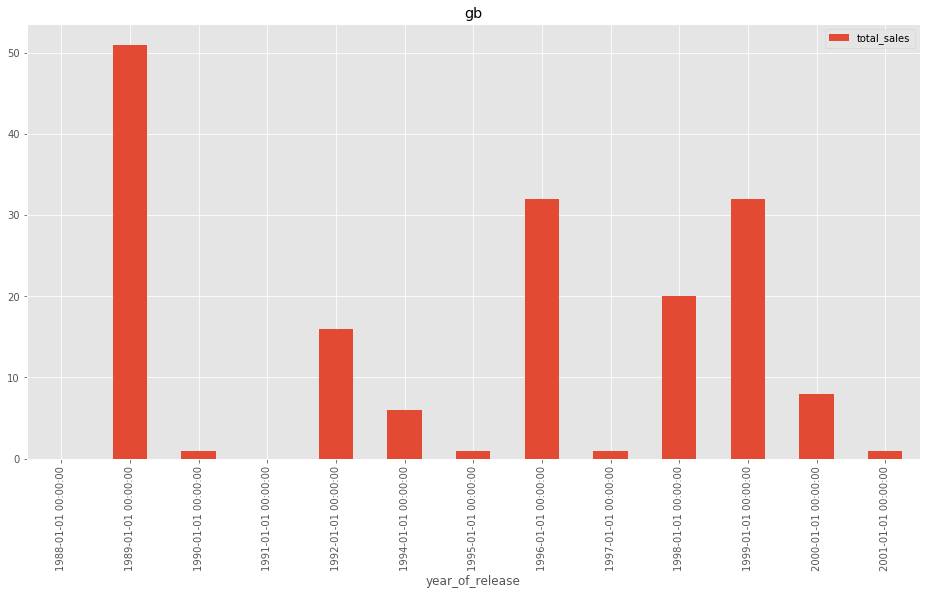

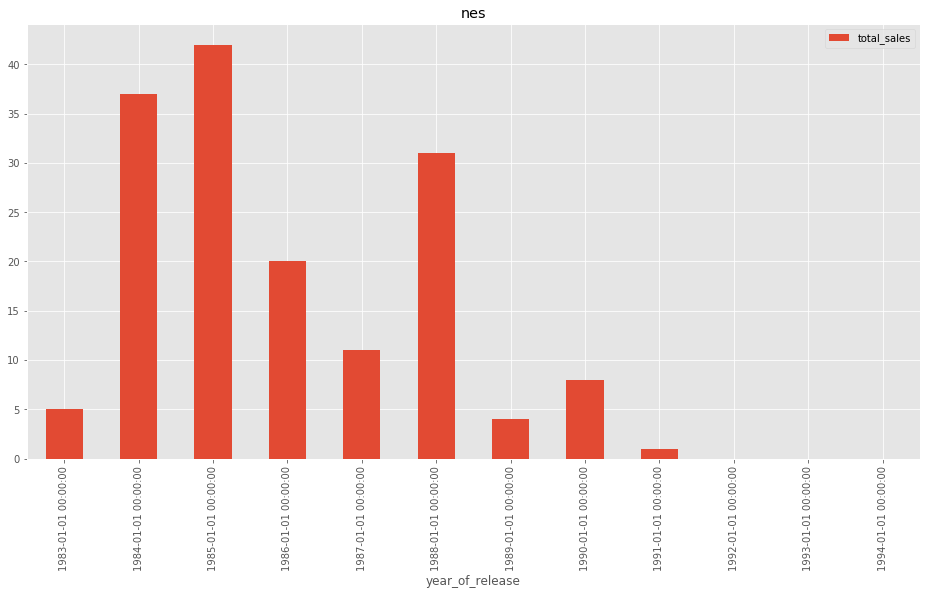

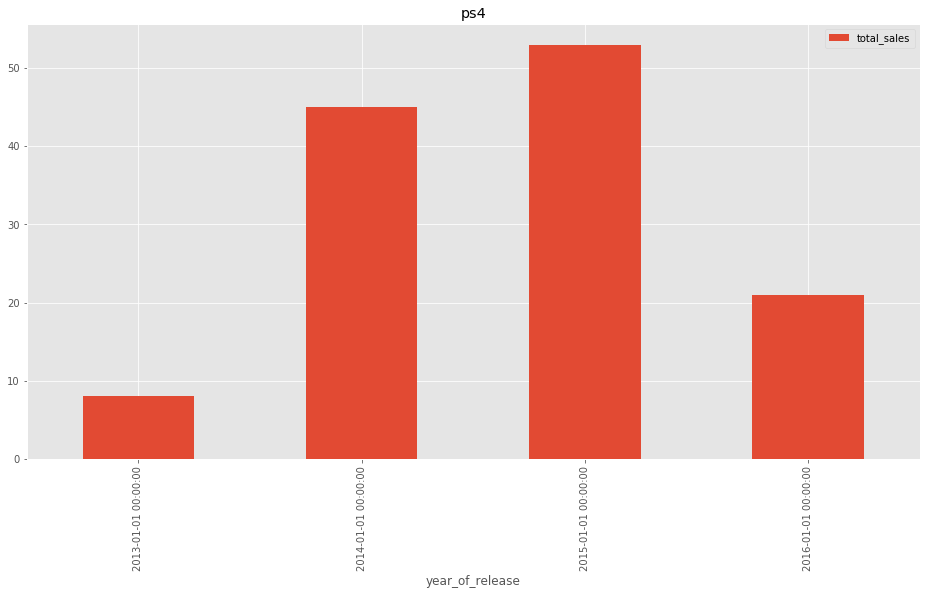

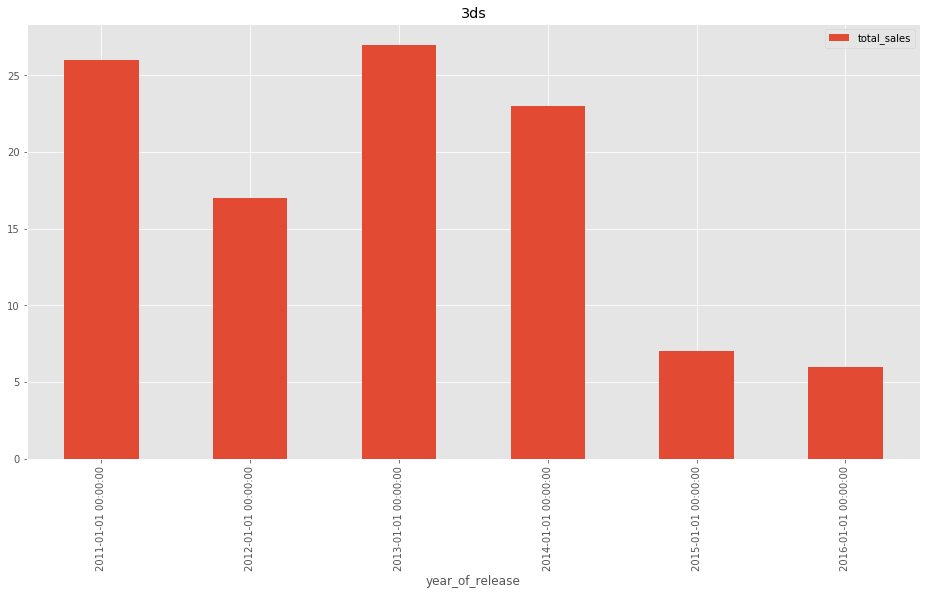

In [66]:
# с использованием цикла построим сводную таблицу с распределением по годам в рамках столбчатой диаграммы 
for platform in largest_platform_group:
    df_1[df_1['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(16,8))
    plt.title(platform)

<div style="border:solid DarkCyan 3px; padding: 20px"> Визуализация в виде диаграммы показала, что лидером рынка является платформа Wii — игровая приставка 7-го поколения, 6-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube, в 2006 и в 2009 гг.  компания продала более 90 млн копий игр на платформу, что закрепило данную платформу в лидерах рынка игровой продукции в период с 2006 г. по 2009 г., далее пошел спад, на смену пришла другая платформа. На втором месте игровая платформа плейстайшин 2 поколения, лидерство ps2 по объемам продаж игр на приставку на рынке занимала с 2001 г. по 2004 г. На тертьем месте x360 - приставка компании Microsoft, которая с 2007 по 2013 гг. стабильно имела объем продаж игр на платформу более 38 млн, пик продаж пришелся на 2010 г. Следующим лидером продаж стала игровая платформа Ds (нинтендо), пиковые продажи игр для этой игровой консоли пришлись с 2005 по 2007 г.</div>

**За какой характерный срок появляются новые и исчезают старые платформы?**

Исследовательский анализ доказывает, что в среднем игровая платформа популярна на рынке и востребована в течение 3 - лет, далее происходит смена лидера рынка. Другими словами через каждые три года появляются новые и исчезают старые платформы.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

<div style="border:solid DarkCyan 3px; padding: 20px"> Предлагагаемое решение поставленной задачи: первое, с учетом того, что лидер рынка меняется в среднем в течение 3 - х лет, анализировать будем рынок объема продаж период с 2014 по 2016 гг. В результате исследования предыдущих вопросов установлено, что в данный период лиедром рынка является платформа - PS 4. </div>

In [67]:
# сделаем срез данных начиная с 2014 г.
df_2014_2016 = df_1.query('year_of_release > 2014')

In [68]:
# выберем платформы - лидеры продаж в период 2014_2016 годов
df_leader = df_2014_2016.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().\
sort_values(by='total_sales', ascending=False)

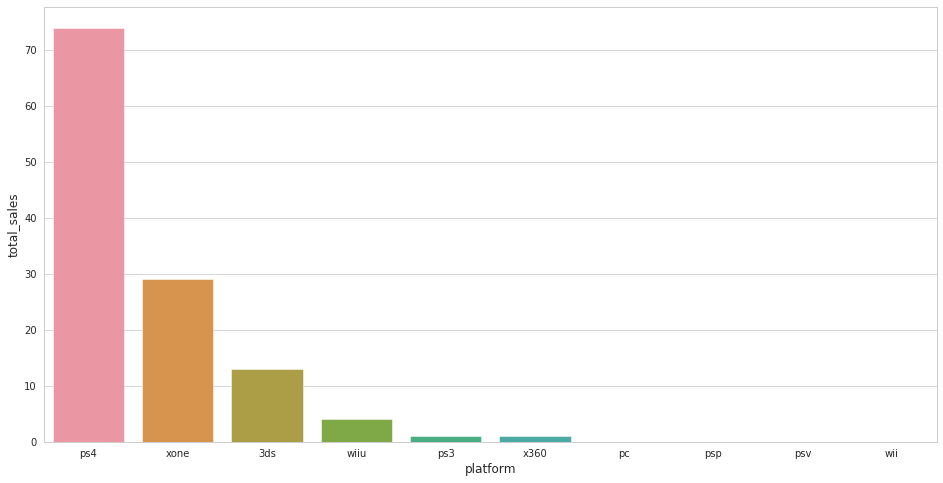

In [69]:
# покажем в сеаборн столбчатую диаграмму результатов лидеров продаж в период с 2014 по 2016 гг. 
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))
sns.barplot(data = df_leader, x='platform', y='total_sales')

<div style="border:solid DarkCyan 3px; padding: 20px"> При прочих равных условиях на рынке игровых платформ в 2017 году сохранится динамика, которая представлена на вышеуказанном графике, лидерство рынка останется за ps4, xone, 3ds.  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.Опишите результат.**

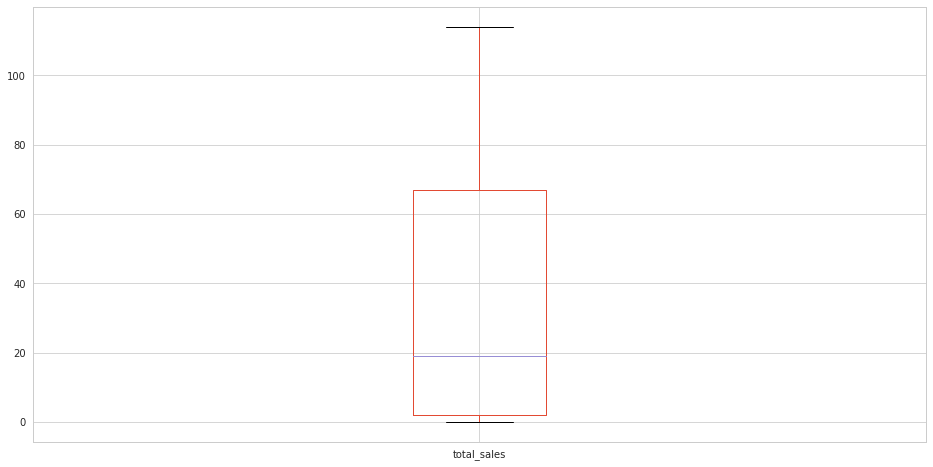

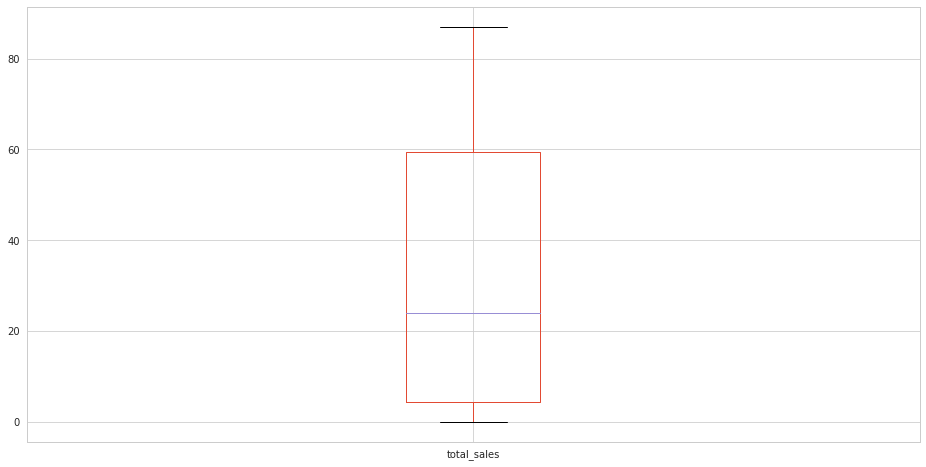

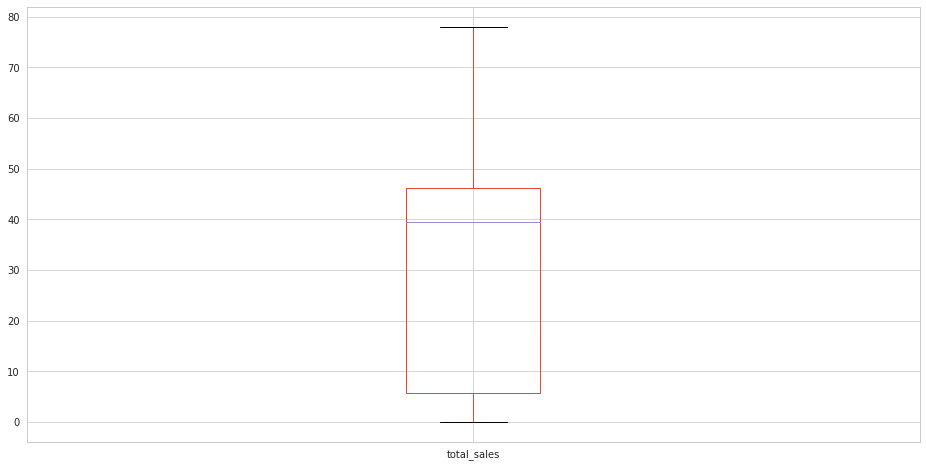

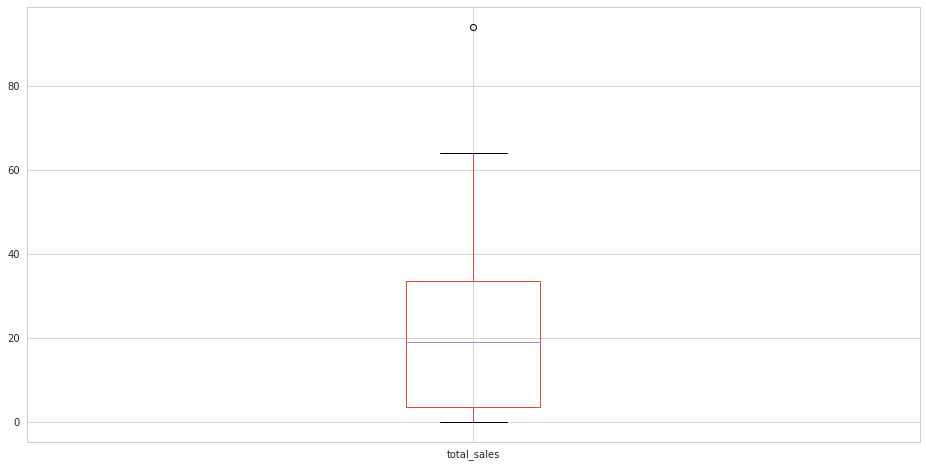

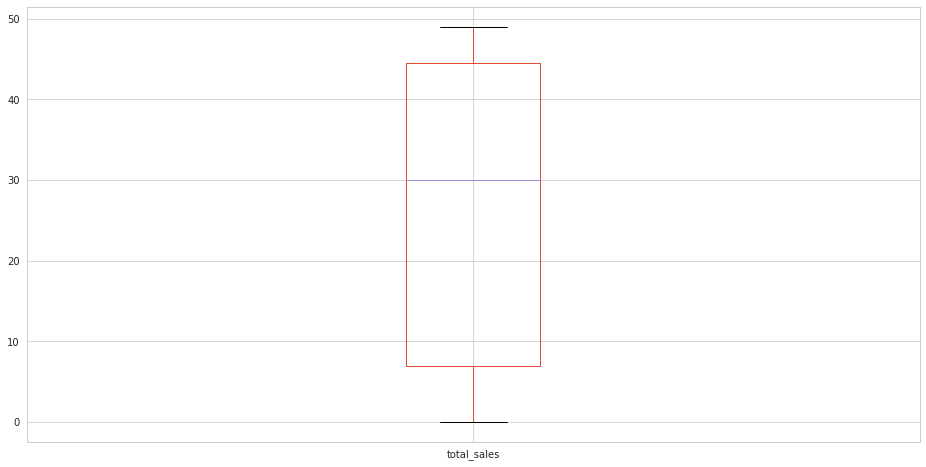

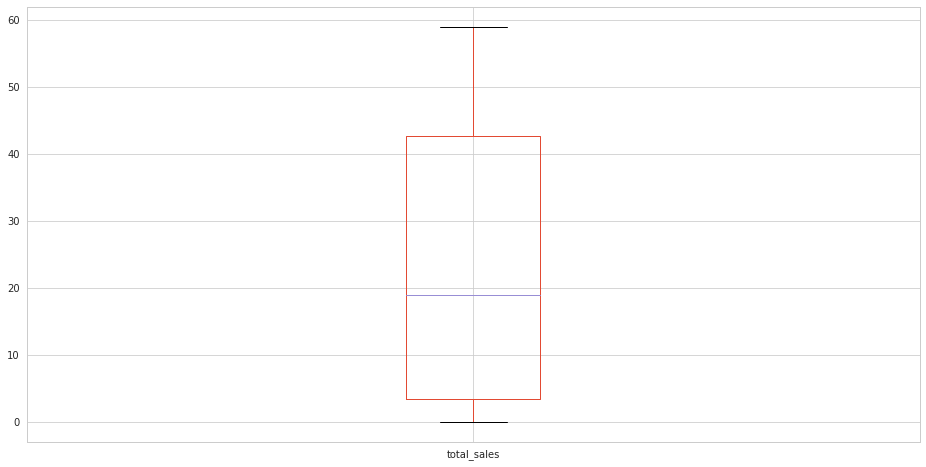

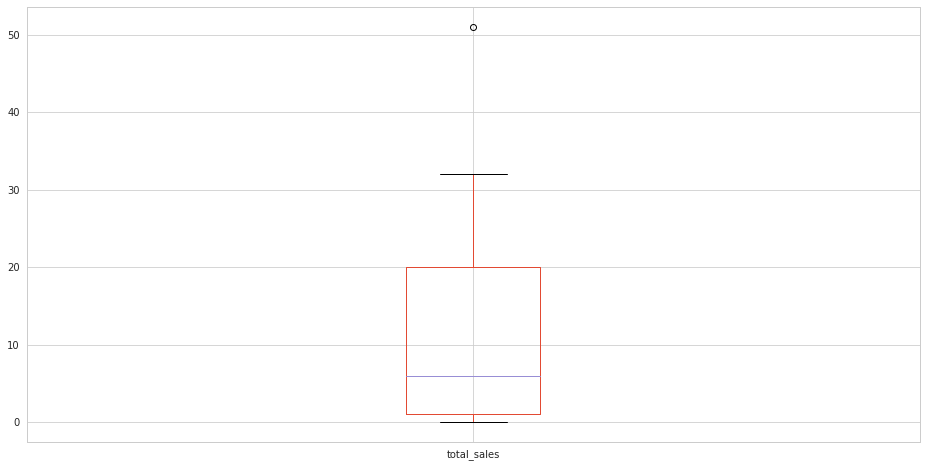

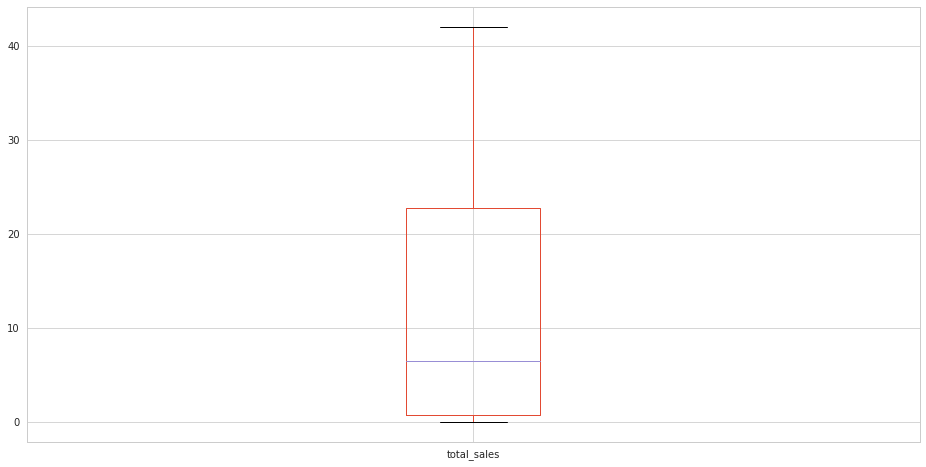

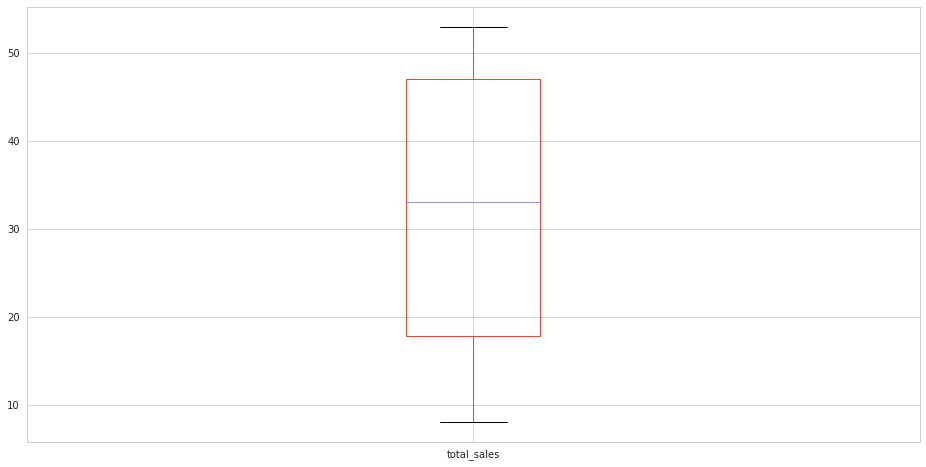

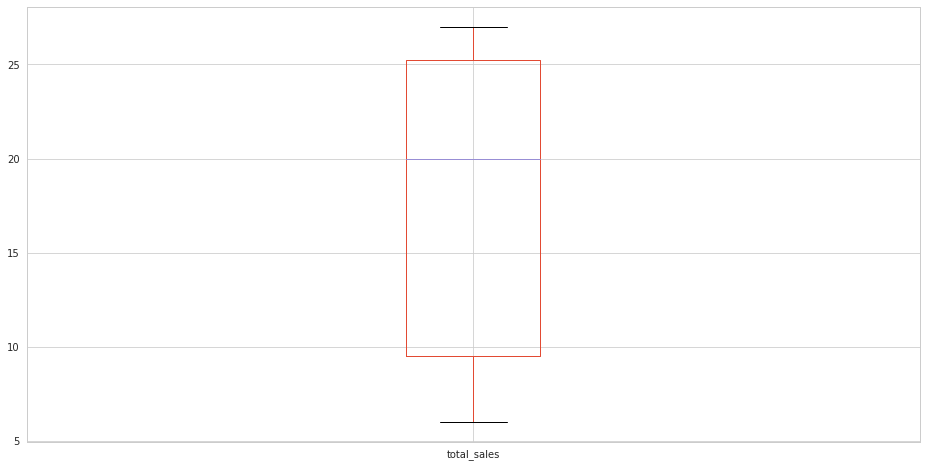

In [70]:
for platform in largest_platform_group:
    df_1[df_1['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
    plot(kind='box', figsize=(16,8))
    plt.show()

<div style="border:solid DarkCyan 3px; padding: 20px"> Ящик с усами или диаграмма размаха  показывает распределение количественных данных таким образом, чтобы облегчить сравнение между переменными или по уровням категориальной переменной. Окно показывает квартили набора данных, а усы расширяются, чтобы показать остальную часть распределения. Чем полезны диагррамы размаха в нашем случае?, прежде всего тем, что мы можем сравнить показатели продаж по платформам по критерию их медиан. Медиана разбивает ряд данных на две части: половина значений меньше медианы и остальная половина – больше. Диаграмма размаха содержит дополнительную информацию о том, как данные распределены внутри ряда: нижняя граница прямоугольника (ящика) – это первый квартиль (величина, превосходящая 25% значений ряда), а верхняя граница – третий квартиль (величина, превосходящая 75% значений). А те самые «усы» — отрезки, отходящие вверх и вниз от середины прямоугольника – строятся на основе интерквартильного размаха и обозначают верхнюю и нижнюю границу значимой части наших данных, исключая выбросы. 1) Исходя из построенных диаграмм размаха выбросов практически в данных нет, отсутсвуют аномалии (шумы), которые свидетельствуют о том, что  данные могут дать нерелевантные результаты. Это очень хорошая новость для исследования в целом. 2)  Медианная стоимость продаж wii - около 20 млн. копий, медианная стоимость продаж ps около 25 млн копий, x360 c  медианной почти 40 млн копий игр продаж на игровую консоль, на ds стабильно продавалось менее 20 млн копий игр. Лидером стабильных продаж является x360 и по этому критерию эта игровая платформа занимает первое место. </div>

**посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.Сформулируйте выводы.**

In [71]:
# Critic_Score — оценка критиков (максимум 100)
# User_Score — оценка пользователей (максимум 10)

In [72]:
# построим корреляцию между оценками пользователей и продажами 
x360 = df_1[df_1['platform']=='x360']
x360['user_score'].corr(x360['total_sales'])

0.020006409875614646

In [73]:
# построим корреляцию между оценками критиков и продажами 
x360 = df_1[df_1['platform']=='x360']
x360['critic_score'].corr(x360['total_sales'])

0.20652635190213475

Text(0.5, 1.0, 'corr_x360')

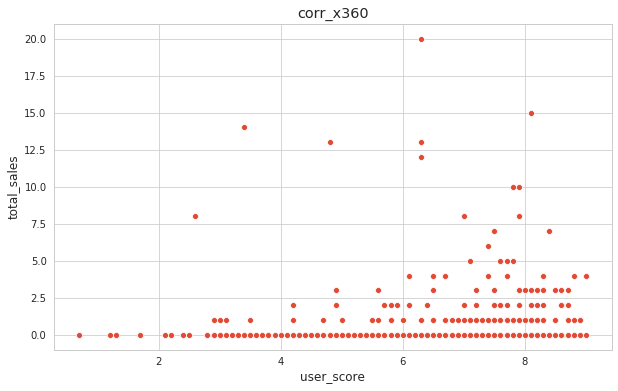

In [74]:
# представим результаты корреляции между оценками пользователей и продажами в диаграмме рассеяния 
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sales', data=x360)
plt.title('corr_x360')

<div style="border:solid DarkCyan 3px; padding: 20px"> Корреляция по Пирсону в части зависимости взяьтых показателей общего количества продаж игр для игровой приставки x360 равна 0.02, что бизко к значению нуль, это свидетельствует об отсутствии зависимости между показателями. </div>

Text(0.5, 1.0, 'corr_x360_crit')

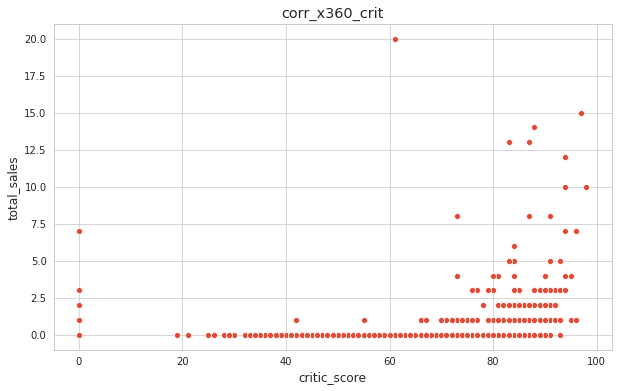

In [75]:
#  представим результаты корреляции между оценками критиков и продажами в диаграмме рассеяния 
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=x360)
plt.title('corr_x360_crit')

<div style="border:solid DarkCyan 3px; padding: 20px"> Корреляция по Пирсону в части зависимости взятых показателей общего количества продаж игр для игровой приставки x360 равна 0.2, что свидетельствует о наличии совершенно незначительной (слабой) зависимости между показателями количества продаж и оценками критиков. </div>

**Cоотнесите выводы с продажами игр на других платформах. Посмотрите на общее распределение игр по жанрам. что можно сказать о самых прибыльных жанрах? выделяются ли жанры с высокими и низкими продажами?**

In [76]:
# по располагаемой информации в общей группе обучения наиболее правильным решением данной задачи является использование функции
# функция должна позволить построить график рассеяния и показать корелляцию у дургих платформ-лидеров 
def platform_matrix(name_platform):
    platform = df_1[df_1['platform']==name_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(12,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_platform, fontsize=12)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Сильная', correl)
    print('\n')
    
    if 0.1 >= correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Корреляция не выявлена', correl)
    if -0.1 >= correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Слабая обратная', correl)
    if -0.3 >= correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Умеренная обратная', correl)
    if -0.5 >= correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Высокая обратная', correl)
    if -0.7 >= correl >= -0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Весьма высокая обратная', correl)
    if -0.9 >= correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_platform.upper(), ': Сильная обратная', correl)
    print('\n')

In [77]:
# возьмем за основу период после 2014 года
df_2014 = df_1.query('year_of_release > 2014')

In [78]:
# выберем 4 наиболее востребованных платформ на рынке и соотнесем с ранее полученными результатами 
leader_4 = ['ps4','xone','wii','3ds']
games_leader_4 = df_2014[df_2014['platform'].isin(['ps4','xone','wii','3ds'])]
games_leader_4 = games_leader_4 [games_leader_4['total_sales']<1.4]

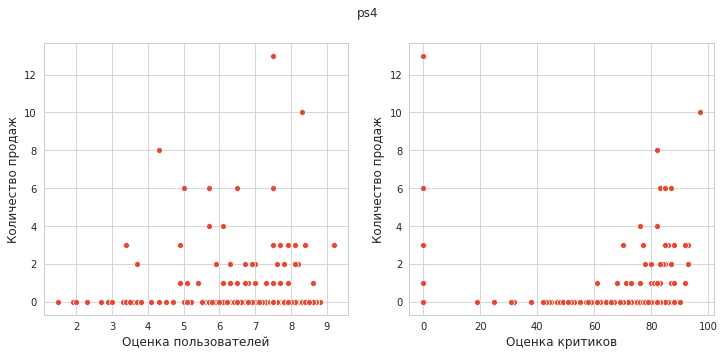

Корреляция между отзывами критиков и игровой платформой  PS4 : Слабая 0.14849667148797643


Корреляция между отзывами пользователей и продажами  PS4 : Корреляция не выявлена -0.060621567176144774




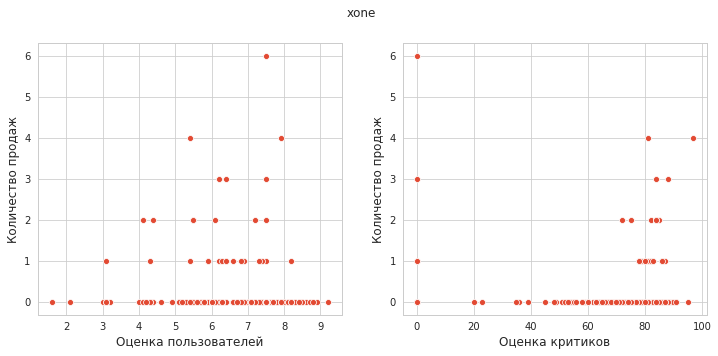

Корреляция между отзывами критиков и игровой платформой  XONE : Слабая 0.13355480995223118


Корреляция между отзывами пользователей и продажами  XONE : Корреляция не выявлена -0.08766546788206606




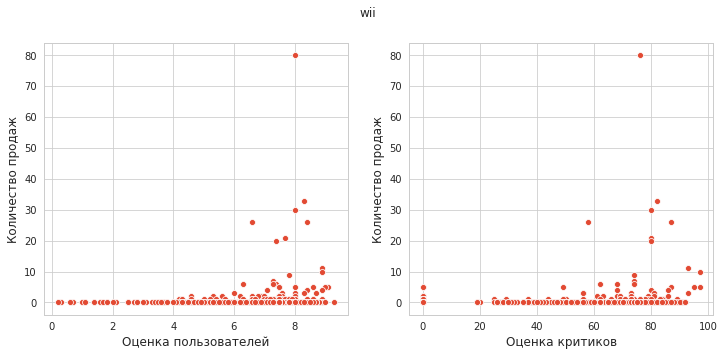

Корреляция между отзывами критиков и игровой платформой  WII : Слабая 0.14289260567965023


Корреляция между отзывами пользователей и продажами  WII : Корреляция не выявлена 0.05060675378843589




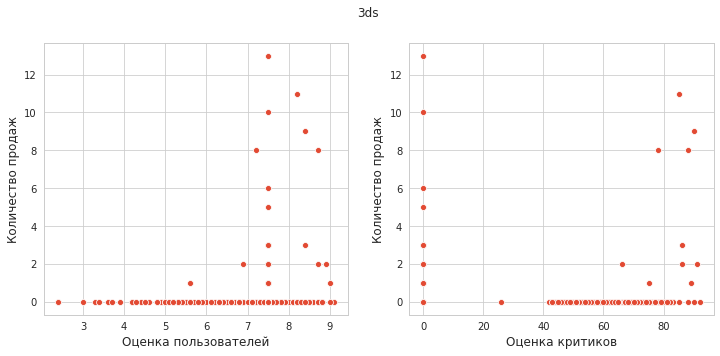



Корреляция между отзывами пользователей и продажами  3DS : Корреляция не выявлена 0.0985126763823749




In [79]:
for platform in leader_4:
    platform_matrix(platform)

<div style="border:solid DarkCyan 3px; padding: 20px"> Другие платформы, такие как 'ps4','xone','wii','3ds' также показывают либо совершеное отсутсвие зависимости между отзывами критиков и игровой платформой, между отзывами пользователей и продажами, либо совершено слабую завимость в перечисленных показателях. </div>

In [80]:
# Посмотриv на общее распределение игр по жанрам. 
# определим что можно сказать о самых прибыльных жанрах? 
# ответим на вопрос выделяются ли жанры с высокими и низкими продажами?
distribution_genre = games_leader_4.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

In [81]:
# распечатаем результат
distribution_genre

,genre,total_sales
0,action,7
1,shooter,4
2,sports,4
3,fighting,2
4,racing,1
5,adventure,0
6,misc,0
7,platform,0
8,puzzle,0
9,role-playing,0


In [82]:
distribution_genre_count = games_leader_4.pivot_table(index='genre', values='total_sales', aggfunc='count').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

In [113]:
# распечатаем результат
distribution_genre_count

,genre,total_sales
0,action,230
1,role-playing,72
2,sports,49
3,shooter,47
4,adventure,42
5,misc,40
6,racing,29
7,fighting,24
8,platform,16
9,simulation,14


<div style="border:solid DarkCyan 3px; padding: 20px"> Полученнные результаты говорят о том, что в пятерку лидеров по жанрам входят: action, Shooter, sports, fighting, racing, данные жанры являются лидерами по продажам. </div>

Text(0, 0.5, 'продажи')

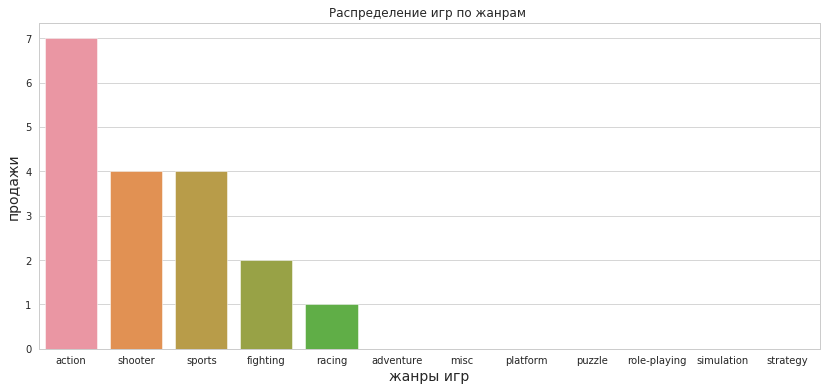

In [83]:
# покажем в сеаборн столбчатую диаграмму результатов распределения игр по жанрам
plt.figure(figsize=(14,6))
plt.title('Распределение игр по жанрам ',fontsize=12)
sns.barplot(data= distribution_genre, x='genre', y='total_sales')
plt.xlabel('жанры игр',fontsize=14)
plt.ylabel('продажи',fontsize=14)

Text(0, 0.5, 'продажи')

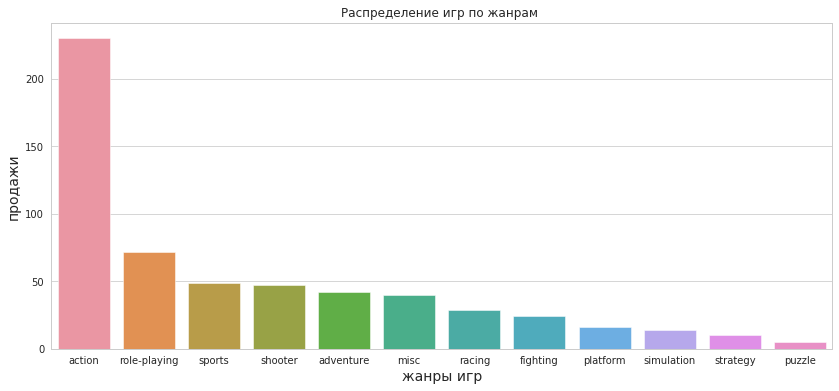

In [114]:
# покажем в сеаборн столбчатую диаграмму результатов распределения игр по жанрам
plt.figure(figsize=(14,6))
plt.title('Распределение игр по жанрам ',fontsize=12)
sns.barplot(data= distribution_genre_count, x='genre', y='total_sales')
plt.xlabel('жанры игр',fontsize=14)
plt.ylabel('продажи',fontsize=14)

<div style="border:solid DarkCyan 3px; padding: 20px"> Очевидно, что жанры с высокими продажами сильно выделяются на фоне жанров с низкими продажами. </div>

## Портрет пользователя

**Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. Самые популярные жанры (топ-5). Поясните разницу. Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

### NA_sales — продажи в Северной Америке

In [84]:
# определим топ_5 самых популярных платформ с помощью сводной таблицы
na_top_platform = df_1.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head(5)

In [85]:
# выведем на экран na_top_platform
display(na_top_platform)

,platform,na_sales
0,x360,289
1,wii,233
2,ps2,225
3,ps3,136
4,ps,132


In [86]:
# определим топ_5 самых популярных жанров с помощью сводной таблицы
na_top_genre = df_1.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [87]:
# выведем на экран na_top_genre
display(na_top_genre)

,genre,na_sales
0,shooter,306
1,action,298
2,platform,250
3,sports,247
4,misc,156


*Подведем итоги по продажам в Северной Америке, цифры говорят, что платформами - лидерами по продажам, являются: x360, wii,  ps2, ps3, ps и в Северной Америке предпочитают следующие игровые жанры: shooter, action, platform, sports, misc (аркада). Игоровая консоль x360, продукт компании Майкрасфот, которая дислоцируется в штате Вашингтон на северо-западе США, wii - это платформа японской компании, специализирующейся на создании видеоигр и игровых систем, со штаб-квартирой в Киото (Япония); ps - это игровая приставка, разработанная компанией Sony Computer Entertainment (японская транснациональная корпорация со штаб-квартирой в Токио). Можно сделать вывод, что в Северной Америке в лидерах продаж свой отечественный продукт из США и остальная часть рынка игровых продуктов занята производителями из Японии.*  

### EU_sales — продажи в Европе

In [88]:
# определим топ_5 самых популярных платформ с помощью сводной таблицы
eu_top_platform = df_1.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [89]:
# выведем на экран eu_top_platform
display(eu_top_platform)

,platform,eu_sales
0,wii,132
1,ps3,123
2,ps2,108
3,ds,85
4,x360,82


In [90]:
# определим топ_5 самых популярных жанров в Европе с помощью сводной таблицы
eu_top_genre = df_1.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [91]:
# выведем на экран eu_top_genre
display(eu_top_genre)

,genre,eu_sales
0,action,156
1,sports,152
2,shooter,122
3,role-playing,81
4,racing,80


*Подведем итоги по продажам в Европе, цифры говорят, что платформами - лидерами по продажам, являются: wii, ps3, ps2, ds, x360 в Европе предпочитают следующие игровые жанры:  action, sports, shooter, role-playning, racing. С учетом ранее представленной характеристики производителей игровых консолей в рамках рассмотрения вопроса в Северной Америке мы наблюдаем совершенно отличную картину, подавляющая часть европейского рынка реализует игровые консоли компаний-производителей из Японии, лишь незначительная доля рынка платформ x360 из США. Отметим, что в списке отсутствуют европейские производители игровых платформ, что говорит о том, что страны европы отнесены к потребителям товаров в виде игровых продуктов из Японии и США.*   

### JP_sales — продажи в Японии

In [92]:
# определим топ_5 самых популярных платформ в Японии с помощью сводной таблицы
jp_top_platform = df_1.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [93]:
# выведем на экран jp_top_platform
display(jp_top_platform)

,platform,jp_sales
0,ds,76
1,nes,57
2,gb,51
3,snes,45
4,3ds,43


In [94]:
# определим топ_5 самых популярных жанров в Японии с помощью сводной таблицы
jp_top_genre = df_1.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [95]:
# выведем на экран eu_top_genre
display(jp_top_genre)

,genre,jp_sales
0,role-playing,160
1,platform,64
2,sports,35
3,misc,32
4,action,24


*Подведем итоги по продажам в Японии, цифры говорят, что платформами - лидерами по продажам являются: ds, nes, gb, snes, 3ds в Японии предпочитают следующие игровые жанры: role-playning, platform, sports, misc (аркада), action. Рынок Японии в сфере игровой продукции насыщен товарами собственного производства, он ориентирован на отечественных производителей и фактически не представлен производителями США. Вкус жителей Северной Америки имеет схожести по критерию жанров с европейцами и сильно отличается от японского. В основном все страны из изучаемых континетов предпочитают жанры спортивных игр, боевиков.*

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [96]:
# посмотрим на перечень критериев оценки рейтинга
# перечислим наиболее часто обозначенные рейтинги 
print(df_1['rating'].unique())
df_1.groupby('rating')['rating'].count()

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: rating, dtype: int64

<div style="border:solid DarkCyan 3px; padding: 20px"> Фрейм данных в цифровых значениях показывает, что 3990 игр имеют рейтинг «E» («Everyone») — «Для всех»;  2961  -  T («Подросткам 13—19 лет»);   М «От 17 лет» - 1563;    E10+ - 1420 «Для всех старше 10 лет». </div>

In [97]:
# покажем количество продаж по критерию рейтинга
eu_top_rating = df_1.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [98]:
eu_top_rating

,rating,eu_sales
0,E,304
1,M,197
2,T,107
3,E10+,36
4,AO,0


<BarContainer object of 5 artists>

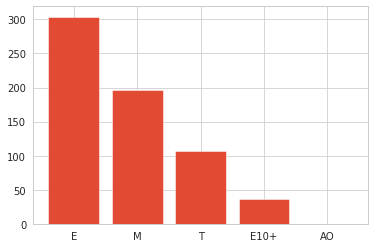

In [99]:
# построим для наглядности столбчатую диаграмму, характеризующую влияние рейтинга на продажи в Европе
groups_eu = eu_top_rating['rating']
counts_eu = eu_top_rating['eu_sales']
plt.bar(groups_eu, counts_eu)

In [100]:
# покажем количество продаж в Северной Америке по критерию рейтинга
na_top_rating = df_1.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [101]:
na_top_rating

,rating,na_sales
0,E,505
1,M,382
2,T,224
3,E10+,84
4,K-A,2


<BarContainer object of 5 artists>

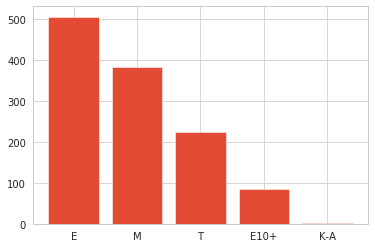

In [102]:
# построим для наглядности столбчатую диаграмму, характеризующую влияние рейтинга на продажи в Европе
groups_na = na_top_rating['rating']
counts_na = na_top_rating['na_sales']
plt.bar(groups_na, counts_na)

In [103]:
# # покажем количество продаж в Японии по критерию рейтинга
jp_top_rating = df_1.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',\
            ascending=False).reset_index().rename_axis(None, axis=1).head()

In [104]:
jp_top_rating

,rating,jp_sales
0,E,92
1,T,38
2,E10+,10
3,M,7
4,K-A,1


<BarContainer object of 5 artists>

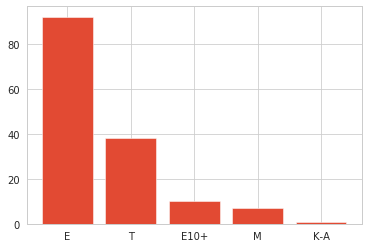

In [105]:
# построим для наглядности столбчатую диаграмму, характеризующую влияние рейтинга на продажи в  Японии
groups_jp = jp_top_rating['rating']
counts_jp = jp_top_rating['jp_sales']
plt.bar(groups_jp, counts_jp)

<div style="border:solid DarkCyan 3px; padding: 20px"> Проведенный анализ показывает лишь факт того, что во всех  (практически без исключения) регионах большинство продаж игр были осуществленны в трех рейтингах: «E» («Everyone») — «Для всех»; T («Подросткам 13—19 лет»); М «От 17 лет». Полагагаю, что перечень рейтингов с их наименованиями с позиции описательной статистики является номинальной шкалой, которая не определяет какого-либо приоритета между категориями рейтинга, а просто идентифицирует их. Основываясь на этом предположении полагаю, что рейтинг ESRB на продажи в отдельном регионе не влияет. При этом производитель игр может предполагать, что если он изобретет продукт подходящий по всем параметрам к рейтингу («Early childhood») вероятность того, что он окупит свои вложения имеет очень малений шанс на успех. В данном вопросе важно полагаться на здравый смысл и следовать экспертной оценке. </div>

## Проверка гипотез

**Гипотезы и отдельные задания по условиям кейса проекта:**
- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
- требуется задать самостоятельно пороговое значение alpha; 
- требуется пояснить: Как сформулировали нулевую и альтернативную гипотезы;
- треьбуется обосновать какой критерий применили для проверки гипотез и почему.

#### Проверка гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div style="border:solid DarkCyan 3px; padding: 20px"> В целях выработки подхода к решению задачи для начала определим какие данные нам нужны, чтобы извлечь полезную информацию в части решения. Представляется, что в исследуемом дата фрейме нам необходимо ориентироваться на показатели: user_score (максимум 10) — оценку пользователей. В проведении операции мы будем использовать подходы статистической проверки гипотез, которая строится на том, что достаточно взять небольшую, но репрезентативную часть данных, представляющую генеральную совокупность. Самый простой способ добиться репрезентативности — использовать случайную выборку. Нам достаточно взять небольшую, но репрезентативную часть данных сritic_score и user_score. В данном разделе проекта потребуется рассчитать параметры генеральной совокупности по выборке — в первую очередь, среднее и дисперсию. Аналитика данных в части гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, может  лишь не противоречить ей или, наоборот, показывать очень маловероятные результаты. </div>

<div style="border:solid DarkCyan 3px; padding: 20px"> Для начала сформулируем нулевую гипотезу   H₀ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Исходя из H₀ сформулируем альтернативную гипотезу: H₁ - средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. H₁ для H₀ — это альтернативная гипотеза, которая противоречит нулевой гипотезе, — либо нулевая гипотеза не отвергается, либо отвергается и принимается H₁. Далее проведем Проверку двусторонней гипотезы в python: t-тест. </div>

<div style="border:solid DarkCyan 3px; padding: 20px"> Возьмем за основу  данные из столбца user_score. Логично будет предположить, что если максимум 10 при оценкe пользователей, то средняя оценка будет равна - 5 . </div>

In [106]:
# выделим из фрейма данных только платформу xbox one
xbox = df_1[df_1['platform']=='xone']

In [107]:
# создадим массив данных
array_user_score = xbox['user_score']

In [108]:
# установим среднюю оценку
interested_value = 5
# обозначим значение альфы согласно общепринятым пороговым значениям
# критический уровень статистической значимости
alpha = .05
results = st.ttest_1samp(
    array_user_score, 
    interested_value)

In [109]:
print('p-значение:', results.pvalue)

# построим для удоства цикл по отношению работы функции к альфе
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.3340159841241422e-60
Отвергаем нулевую гипотезу


<div style="border:solid DarkCyan 3px; padding: 20px"> p-значение H₀:  [1.33], что фактически означает более вероятные результаты альтернативной гипотезы: H₁ - средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые.  </div>

#### Проверка гипотезы, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<div style="border:solid DarkCyan 3px; padding: 20px"> Для начала сформулируем нулевую гипотезу   H₀ - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Исходя из H₀ сформулируем альтернативную гипотезу: H₁ - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») ОДИНАКОВЫЕ. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. H₁ для H₀ — это альтернативная гипотеза, которая противоречит нулевой гипотезе, — либо нулевая гипотеза не отвергается, либо отвергается и принимается H₁. Далее проведем Проверку двусторонней гипотезы в python: t-тест. </div>

In [110]:
# создадим переменную и выделим в ней только жанр экшен-игры
action = df_1[df_1['genre']=='action']
# создадим переменную и выделим в ней только жанр спорт
sport = df_1[df_1['genre']=='sport']

In [111]:
# создадим массив данных
array_action = action['user_score']
array_sport = sport['user_score']

<div style="border:solid DarkCyan 3px; padding: 20px"> В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var)</div>

In [112]:
results_1 = st.ttest_ind(
    array_action, 
    array_sport)

print('p-значение: ', results.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.3340159841241422e-60
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid DarkCyan 3px; padding: 20px">  проведенный t-test показывает, что H₀ - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные! </div>

## Общий вывод

<div style="border:solid DarkCyan 3px; padding: 20px"> Главной задачей в рамках проекта, мне как сотруднику интернет-магазина «Стримчик», поставлена задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Интернет-магазин «Стримчик» располагается территориально в России, следовательно важным критерием для сегментирования рынка явлется его территориальные особенности. В этой связи в рамках проекта вывлены следующие закономерности:
    
1) Европейцы предпочитают производителей платформ из Японии, следовательно необходимо выбрать для продажи игры, которые подходят к игровым приставкам: wii, ps3, ps2, ds;
    
2) При выборе игр наибольшее предпочтение потребители в Европе (Россия часть Европы) отдают таким жанрам как:  action, sports, shooter, role-playning, racing; 
    
3) Важно помнить, что основными производителями игр явлются компании, которые представлены в Америке и Японии. Расчитывать на то, что американский потребитель или японский в массе обратится в интернет-магазин "Стримчик" не стоит, поскольку их по критерию территориальной принадлежности рынки насыщены собственными производителями. Очевидно, что итогавая цена (стоимость) игровых продуктов для потребителей США и Японии по данному фактору может оказаться ниже из-за отсутствия, например, издержек на транспортировку товаров;
    
4) Игровые платформы на рынке по критерию продаж чередуются через каждые три года, важно ориентироваться на планировании продаж игр для платформ, поскольку потребность на игры, например, ps 3, 4 может в текущее время оказаться выше у потребителей, чем на игры платформы ps 2, как более устаревшей модели и явно уступающей по качеству всего продукта более совершенным моделям.
</div>